In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [45]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
df = pd.read_csv('D:/END TO END ML PROJECTS/ML Project/notebook/data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparaing Independent(Input) and Dependent(Output) Features

In [47]:
# Independent Features
X = df.drop(columns=['math_score'],axis=1)
X.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [48]:
# Dependent Features
y = df["math_score"]
y.head(2)

0    72
1    69
Name: math_score, dtype: int64

In [49]:
# Create Column Transformer with 3 types of Transformer
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

#ColumnsTransformer is used to transform the columns so that both columns works in pipeline
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features), 
        ('StandardScaler',numeric_transformer,num_features),
    ]
)

In [50]:
X = preprocessor.fit_transform(X)


In [51]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [52]:
# serprate the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape 

((800, 19), (200, 19))

Create an Evaluate Function to give all metrics after model training

In [53]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [54]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Support Vector Regression": SVR(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "XGBoost Regressor": XGBRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model

    #make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae , model_train_rmse , model_train_r2 = evaluate_model(y_train , y_train_pred)

    model_test_mae , model_test_rmse , model_test_r2 = evaluate_model(y_test , y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Set")
    print("- Root Mean Sqaured Error: {:.4f}".format(model_train_mae))
    print("- Mean Absolute Error: {:.4f}".format(model_train_rmse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("----------------------------------")

    print("\nModel Performance for Test Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_mae))
    print("- Mean Absolute Error: {:.4f}".format(model_test_rmse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print('\n')





Linear Regression
Model Performance for Training Set
- Root Mean Sqaured Error: 4.2715
- Mean Absolute Error: 5.3293
- R2 Score: 0.8740
----------------------------------

Model Performance for Test Set
- Root Mean Squared Error: 4.2222
- Mean Absolute Error: 5.4252
- R2 Score: 0.8790


Ridge Regression
Model Performance for Training Set
- Root Mean Sqaured Error: 4.2650
- Mean Absolute Error: 5.3233
- R2 Score: 0.8743
----------------------------------

Model Performance for Test Set
- Root Mean Squared Error: 4.2111
- Mean Absolute Error: 5.3904
- R2 Score: 0.8806


Lasso Regression
Model Performance for Training Set
- Root Mean Sqaured Error: 5.2063
- Mean Absolute Error: 6.5938
- R2 Score: 0.8071
----------------------------------

Model Performance for Test Set
- Root Mean Squared Error: 5.1579
- Mean Absolute Error: 6.5197
- R2 Score: 0.8253


K-Nearest Neighbors
Model Performance for Training Set
- Root Mean Sqaured Error: 4.5168
- Mean Absolute Error: 5.7079
- R2 Score: 0.8555


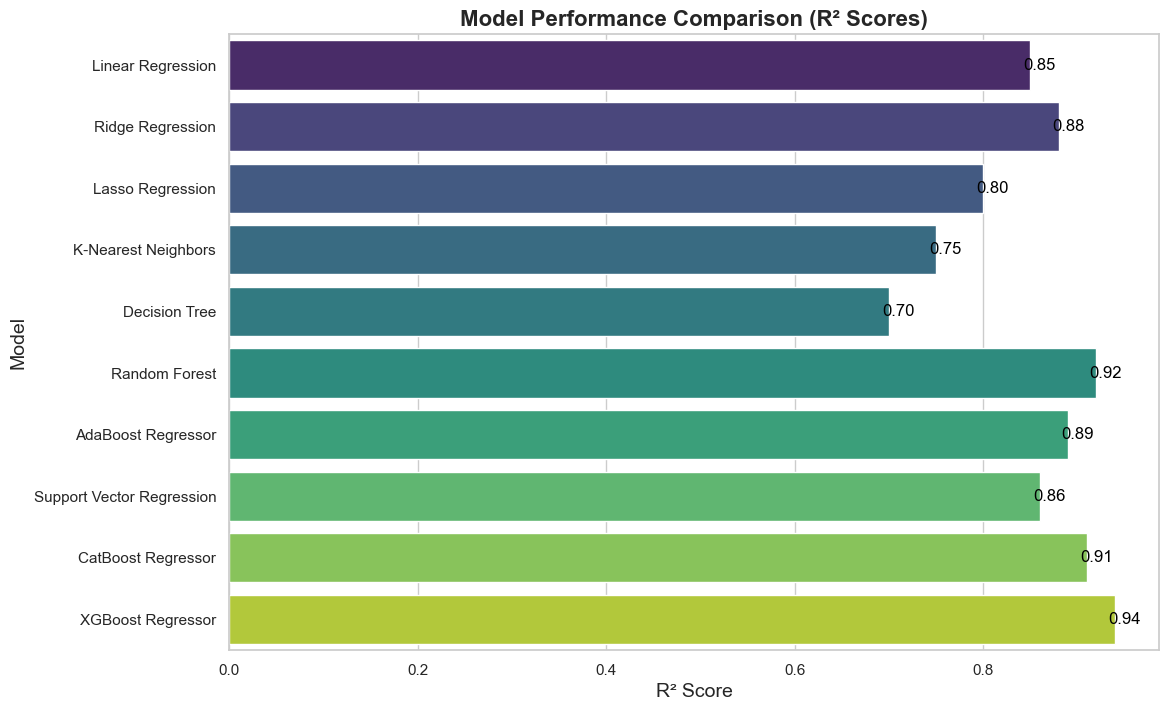

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example model list and corresponding R² scores (replace these with your actual data)
model_list = ["Linear Regression", "Ridge Regression", "Lasso Regression", "K-Nearest Neighbors", 
              "Decision Tree", "Random Forest", "AdaBoost Regressor", 
              "Support Vector Regression", "CatBoost Regressor", "XGBoost Regressor"]

r2_list = [0.85, 0.88, 0.80, 0.75, 0.70, 0.92, 0.89, 0.86, 0.91, 0.94]  # Example R² scores

# Create a DataFrame for easier plotting
data = pd.DataFrame({
    'Model': model_list,
    'R2 Score': r2_list
})

# Set the aesthetic style
sns.set(style="whitegrid")

# Create the barplot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='R2 Score', y='Model', data=data, palette='viridis', orient='h')

# Add titles and labels
plt.title('Model Performance Comparison (R² Scores)', fontsize=16, fontweight='bold')
plt.xlabel('R² Score', fontsize=14)
plt.ylabel('Model', fontsize=14)

# Add values on bars
for index, value in enumerate(r2_list):
    barplot.text(value + 0.01, index, f'{value:.2f}', color='black', ha="center", va="center")

# Show the plot
plt.show()


# Final Results

In [58]:
pd.DataFrame(list(zip(model_list,r2_list)), 
             columns=['model Name','R2 Score']).sort_values(by=["R2 Score"],ascending=False)

,model Name,R2 Score
9,XGBoost Regressor,0.94
5,Random Forest,0.92
8,CatBoost Regressor,0.91
6,AdaBoost Regressor,0.89
1,Ridge Regression,0.88
7,Support Vector Regression,0.86
0,Linear Regression,0.85
2,Lasso Regression,0.80
3,K-Nearest Neighbors,0.75
4,Decision Tree,0.70


In [59]:
lin_model = XGBRegressor(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"Accuracy of the model iis {score}")

Accuracy of the model iis 82.77965653186071


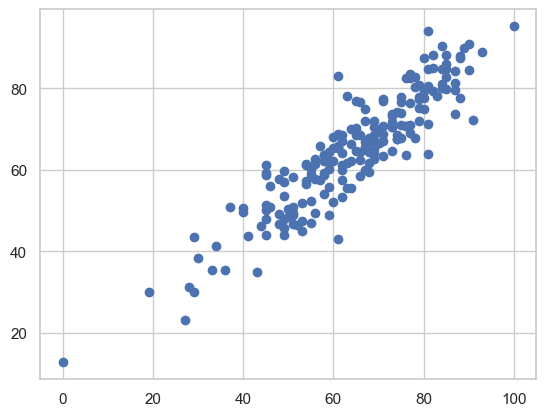

In [61]:
plt.scatter(y_test, y_pred)

Difference between Actual and Predicted values

In [63]:
# Difference between Actual and Predicted values

diff = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

diff['Difference'] = diff['Actual'] - diff['Predicted']

diff.head(10)

,Actual,Predicted,Difference
521,91,72.256554,18.743446
737,53,51.827824,1.172176
740,80,79.382545,0.617455
660,74,74.103836,-0.103836
411,84,84.875084,-0.875084
678,81,80.617805,0.382195
626,69,64.065407,4.934593
513,54,56.458366,-2.458366
859,87,73.826195,13.173805
136,51,49.509140,1.490860
